<a href="https://colab.research.google.com/github/newstage75/ML_study/blob/master/%E6%9C%80%E7%9F%ADPytorch/2%E7%AB%A0PyTorch%E3%81%AE%E5%9F%BA%E6%9C%AC%E6%A9%9F%E8%83%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考URL
https://github.com/makaishi2/pytorch_book_info

PyTorch→Tensorでデータを表現

・自動微分機能

In [3]:
# 必要ライブラリの導入
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1

In [4]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [5]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

重要な関数<br>
view→NumPyのreshape<br>
item→テンソルとして損失計算から値を取り出す時に使用<br>
max→多値分類で予測結果から予測ラベル値を取得<br>


In [6]:
#PyTorchライブラリ
import torch

In [7]:
r0 = torch.tensor(1.0).float()

print(type(r0))

print(r0.dtype)

<class 'torch.Tensor'>
torch.float32


torch.tensor関数がテンソル変数を作るのに一番簡単<br>
必ず後ろに.float()をつける。３２ビットにしないと、nn.Linearなど機械学習で利用するライブラリを使う際にエラーになる。

In [8]:
print(r0.shape)

print(r0.data)

torch.Size([])
tensor(1.)


In [9]:
#1階テンソル

#まずNumPyで
r1_np = np.array([1, 2, 3, 4, 5])
print(r1_np.shape)

(5,)


In [10]:
#NumPyからテンソルに変換
r1 = torch.tensor(r1_np).float()

print(r1.dtype)

print(r1.shape)

print(r1.data)

torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


テンソル変数とNumPy変数は似たところが多く、相互に行き来が可能。

In [11]:
#次に２回テンソルの場合

#まずNumPy
r2_np = np.array([[1, 5, 6], [4, 3, 2]])
print(r2_np.shape)

r2 = torch.tensor(r2_np).float()

print(r2.shape)

print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [12]:
# ３階テンソル

# 乱数seedの初期化
torch.manual_seed(123)

# shape=[3,2,2]の正規分布変数テンソルを作る
r3 = torch.randn((3, 2, 2))

# shapeを調べる
print(r3.shape)

# データを調べる
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [13]:
# 4階テンソル

# shape=[2,3,2,2]の要素がすべて1のテンソルを作る
r4 = torch.ones((2, 3, 2, 2))

# shapeを調べる
print(r4.shape)

# データを調べる
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


long→torch.int64になる。

In [14]:
r5 = r1.long()

#dtype
print(r5.dtype)

#値
print(r5)

torch.int64
tensor([1, 2, 3, 4, 5])


## view関数

In [15]:
#r3 -> (3, 2, 2)

r6 = r3.view(3,-1)

print(r6.shape)

print(r6.data)

torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [16]:
#r3 -> (3, 2, 2)

r7 = r3.view(-1)

print(r7.shape)

print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


In [17]:
#require_grad属性（自動微分機能と関係）
print('requires_grad: ', r1.requires_grad)

requires_grad:  False


In [18]:
#device属性(GPU計算と関係)
print('device: ', r1.device)

device:  cpu


In [19]:
#item関数（テンソルからPython本来のクラスの数値を取り出すのにitem関数が使える）
item = r0.item()

print(type(item))
print(item)

<class 'float'>
1.0


In [20]:
#itemは1回以上のテンソルは対象にできない
print(r1.item())

ValueError: ignored

In [ ]:
#max関数->最大値の取得
print(r2)

print(r2.max())

In [22]:
#torch.max関数
#2つ目の引数はどの軸で集約するかを意味する
print(torch.max(r2, 1))

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))


In [23]:
#何番目の要素が最大値をとるかはindicesを調べれば良い。
#以下の計算は、多値分類で予測ラベルを求めるときによく利用されるパターン
print(torch.max(r2, 1)[1])

tensor([2, 0])


## テンソルからNumPyへの変換->numpy()関数を利用すればOK
### ただし、この形で変数に代入すると、テンソル変数とNumPy配列は同じデータを指すので、
### テンソル側で値が変わるとNumPyも連動して変わる。

この挙動で困る場合は、r2.data.numpy().copy()でコピーを作る実装をすること。

In [24]:
#NumPy変数への変換
r2_np = r2.data.numpy()

#type確認
print(type(r2_np))

#値確認
print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


## 自動微分機能


1.   勾配計算用変数の定義（requires_grad = True）
2.   テンソル変数間で計算。裏で計算グラフが自動生成される
3.   計算グラフの可視化（make_dot関数）
4.   勾配計算（backward関数）
5.   勾配値の取得(grad属性)
6.   勾配値の初期化(zero_関数)





In [26]:
#二次関数の勾配計算
x_np = np.arange(-2, 2.1, 0.25)

print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [27]:
#1.勾配計算用変数の定義
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


In [28]:
y = 2*x**2 + 2
print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


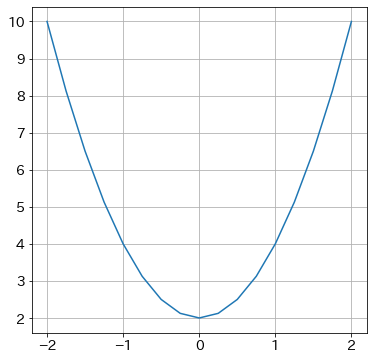

In [29]:
plt.plot(x.data, y.data)
plt.show()

これから、PyTorchの機能を使って勾配計算するが、その場合計算対象の関数はスカラーである必要がある。
この条件に合わせるため、yの値をsumで全て足して、足した結果を新しいテンソル変数zに代入する。

In [30]:
#ダミーで足し合わせる
z=y.sum()
print(z)

tensor(85., grad_fn=<SumBackward0>)


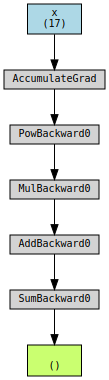

In [32]:
#3.計算グラフの可視化

#必要ライブラリのインポート
from torchviz import make_dot

#可視化関数の呼び出し
g = make_dot(z, params={'x':x})
display(g)

上の
Pow:累乗、Mult:掛け算、Add:足し算。
値を計算しながら計算過程を自動的に記録する機能を「Define by Run」と呼ぶ